In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("covid19_global_statistics_2026.csv")

In [3]:
df.head(3)

,continent,country,population,date,new_cases,active_cases,cases_per_million,total_cases,new_deaths,deaths_per_million,total_deaths,tests_per_million,total_tests
0,Africa,Eritrea,3662244.0,2026-02-16,NaN,0.0,2782.0,10189,NaN,28.0,103.0,6470.0,23693.0
1,Africa,Niger,26083660.0,2026-02-16,NaN,729.0,381.0,9931,NaN,12.0,312.0,9759.0,254538.0
2,Africa,Saint-Helena,6115.0,2026-02-16,NaN,2164.0,354211.0,2166,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(238, 13)

In [5]:
df.columns

Index(['continent', 'country', 'population', 'date', 'new_cases',
       'active_cases', 'cases_per_million', 'total_cases', 'new_deaths',
       'deaths_per_million', 'total_deaths', 'tests_per_million',
       'total_tests'],
      dtype='str')

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           236 non-null    str    
 1   country             238 non-null    str    
 2   population          229 non-null    float64
 3   date                238 non-null    str    
 4   new_cases           17 non-null     float64
 5   active_cases        191 non-null    float64
 6   cases_per_million   230 non-null    float64
 7   total_cases         238 non-null    int64  
 8   new_deaths          3 non-null      float64
 9   deaths_per_million  225 non-null    float64
 10  total_deaths        233 non-null    float64
 11  tests_per_million   213 non-null    float64
 12  total_tests         213 non-null    float64
dtypes: float64(9), int64(1), str(3)
memory usage: 24.3 KB


In [7]:
df.describe()

,population,new_cases,active_cases,cases_per_million,total_cases,new_deaths,deaths_per_million,total_deaths,tests_per_million,total_tests
count,2.290000e+02,17.000000,1.910000e+02,230.000000,2.380000e+02,3.000000,225.000000,2.330000e+02,2.130000e+02,2.130000e+02
mean,3.469404e+07,103.058824,2.636781e+05,202460.960870,8.883449e+06,3.333333,1275.668444,9.026621e+04,2.155978e+06,3.298829e+07
std,1.386374e+08,212.516608,1.923405e+06,205838.075508,5.193031e+07,4.163332,1307.746257,5.163434e+05,3.647972e+06,1.198779e+08
min,7.990000e+02,0.000000,0.000000e+00,16.000000,9.000000e+00,0.000000,2.000000,1.000000e+00,5.093000e+03,7.850000e+03
25%,4.454310e+05,10.000000,4.550000e+01,19423.250000,2.741875e+04,1.000000,176.000000,2.250000e+02,1.981990e+05,3.478150e+05
50%,5.797805e+06,13.000000,6.620000e+02,128762.000000,2.320425e+05,2.000000,869.000000,2.570000e+03,8.851190e+05,2.226216e+06
75%,2.210284e+07,63.000000,8.017500e+03,331302.750000,1.565481e+06,5.000000,2092.000000,1.805700e+04,2.439107e+06,1.346373e+07
max,1.448471e+09,702.000000,2.212340e+07,771655.000000,7.047539e+08,8.000000,6595.000000,7.010681e+06,2.330212e+07,1.186852e+09


In [8]:
df.isnull().sum()

continent               2
country                 0
population              9
date                    0
new_cases             221
active_cases           47
cases_per_million       8
total_cases             0
new_deaths            235
deaths_per_million     13
total_deaths            5
tests_per_million      25
total_tests            25
dtype: int64

In [9]:
#Drop column:-
df.drop(['new_cases' , 'new_deaths' , 'continent'] , axis=1 , inplace=True)

In [10]:
#fill the missing data -
#for population.
df.loc[
    df['population'].isna() & 
    df['cases_per_million'].notna() & 
    (df['cases_per_million'] != 0),
    'population'
] = (df['total_cases'] * 1_000_000) / df['cases_per_million']

#for cases_per_million.
df.loc[
    df['cases_per_million'].isna() & 
    df['population'].notna() & 
    (df['population'] != 0),
    'cases_per_million'
] = (df['total_cases'] / df['population']) * 1_000_000

#only 1 value fill in this operation , but it's convinent way.

In [11]:
#Drop rows-
df.dropna(subset=['population' , 'cases_per_million'] , inplace=True)

In [12]:
#fill the missing data -
#for total deaths.
df.loc[
    (df['total_deaths'] == 0) &
    (df['population'] != 0) &
    (df['deaths_per_million'] != 0),
    'total_deaths'
] = (df['deaths_per_million'] * df['population']) / 1_000_000


#for deaths_per_million.
df.loc[
    df['deaths_per_million'].isna() &
    df['population'].notna() &
    (df['population'] != 0),
    'deaths_per_million'
] = (df['total_deaths'] / df['population']) * 1_000_000

#only 8 values fill in this operation , but it's convinent way.

In [13]:
#Drop rows-
df.dropna(subset=['total_deaths' , 'deaths_per_million'] , inplace=True)

In [14]:
df.shape

(225, 10)

In [16]:
# #fill the missing data -
# for total_tests.
# df.loc[
#     df['total_tests'].isna() &
#     df['tests_per_million'].notna() &
#     (df['population'] != 0),
#     'total_tests'
# ] = (df['tests_per_million'] * df['population']) / 1_000_000

# #foe tests_per_million.
# df.loc[
#     df['tests_per_million'].isna() &
#     df['total_tests'].notna() &
#     (df['population'] != 0),
#     'tests_per_million'
# ] = (df['total_tests'] / df['population']) * 1_000_000


# this is not working ,because null value present on same place....


In [19]:
df.dropna(subset=['tests_per_million' , 'total_tests'] , inplace=True)

In [21]:
# in active_cases column - fill the NAN value --> 0.0
df['active_cases'] = df['active_cases'].fillna(0.0)

In [22]:
df.isnull().sum()

country               0
population            0
date                  0
active_cases          0
cases_per_million     0
total_cases           0
deaths_per_million    0
total_deaths          0
tests_per_million     0
total_tests           0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
#datatype conversion(float to int) -
cols = ['active_cases', 'cases_per_million', 'total_deaths', 'tests_per_million' , 'deaths_per_million' , 'total_tests']
df[cols] = df[cols].astype('Int64')

In [29]:
df.info()

<class 'pandas.DataFrame'>
Index: 212 entries, 0 to 237
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   country             212 non-null    str  
 1   population          212 non-null    Int64
 2   date                212 non-null    str  
 3   active_cases        212 non-null    Int64
 4   cases_per_million   212 non-null    Int64
 5   total_cases         212 non-null    int64
 6   deaths_per_million  212 non-null    Int64
 7   total_deaths        212 non-null    Int64
 8   tests_per_million   212 non-null    Int64
 9   total_tests         212 non-null    Int64
dtypes: Int64(7), int64(1), str(2)
memory usage: 19.7 KB


In [27]:
df['population'] = df['population'].astype('Int64')

In [30]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [35]:
df.head(3)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
0,Eritrea,3662244,2026-02-16,0,2782,10189,28,103,6470,23693
1,Niger,26083660,2026-02-16,729,381,9931,12,312,9759,254538
2,Montserrat,4965,2026-02-16,19,282578,1403,1611,8,3577442,17762


In [32]:
df.shape

(212, 10)

In [36]:
#reset index.
df.reset_index(drop=True, inplace=True)

In [39]:
df.head(5)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
0,Eritrea,3662244,2026-02-16,0,2782,10189,28,103,6470,23693
1,Niger,26083660,2026-02-16,729,381,9931,12,312,9759,254538
2,Montserrat,4965,2026-02-16,19,282578,1403,1611,8,3577442,17762
3,China,1448471400,2026-02-16,118977,347,503302,4,5272,110461,160000000
4,Liberia,5305117,2026-02-16,12,1525,8090,56,295,26356,139824


#✅ STEP 1 — Basic Overview (Understanding Stage)

In [41]:
df.shape

(212, 10)

In [42]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             212 non-null    str           
 1   population          212 non-null    Int64         
 2   date                212 non-null    datetime64[us]
 3   active_cases        212 non-null    Int64         
 4   cases_per_million   212 non-null    Int64         
 5   total_cases         212 non-null    int64         
 6   deaths_per_million  212 non-null    Int64         
 7   total_deaths        212 non-null    Int64         
 8   tests_per_million   212 non-null    Int64         
 9   total_tests         212 non-null    Int64         
dtypes: Int64(7), datetime64[us](1), int64(1), str(1)
memory usage: 18.1 KB


In [43]:
df.describe()

,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
count,212.0,212,212.0,212.0,2.120000e+02,212.0,212.0,212.0,212.0
mean,36962556.669811,2026-02-16 00:00:00,28757.834906,203990.759434,3.300499e+06,1325.622642,33057.410377,2154642.363208,33143852.268868
min,4965.0,2026-02-16 00:00:00,0.0,347.0,1.403000e+03,3.0,1.0,5093.0,7850.0
25%,661210.25,2026-02-16 00:00:00,0.0,20499.75,3.754050e+04,185.5,295.0,196135.0,355960.0
50%,6706560.0,2026-02-16 00:00:00,170.0,132143.0,2.695990e+05,925.5,2918.5,876230.5,2264975.0
75%,26072509.0,2026-02-16 00:00:00,2783.0,336456.75,1.511328e+06,2099.5,16955.75,2419068.25,13509460.0
max,1448471400.0,2026-02-16 00:00:00,1783377.0,771655.0,1.118201e+08,6595.0,1219487.0,23302116.0,1186851502.0
std,143804265.184229,NaN,154512.701687,205779.895219,1.042140e+07,1319.604234,113649.877743,3656554.197444,120140099.915194


#✅ STEP 2 — Top & Bottom Countries Analysis

In [44]:
#top 10 countries by total_cases.
df.sort_values(by='total_cases', ascending=False).head(10)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
199,USA,334805269,2026-02-16,786167,333985,111820082,3642,1219487,3544901,1186851502
200,India,1406631776,2026-02-16,0,32016,45035393,379,533570,665334,935879495
201,France,65584518,2026-02-16,0,612013,40138560,2556,167642,4139547,271490188
202,Germany,83883596,2026-02-16,405368,462891,38828995,2182,183027,1458359,122332384
203,Brazil,215353593,2026-02-16,1783377,179908,38743918,3303,711380,296146,63776166
204,S-Korea,51329899,2026-02-16,0,673523,34571873,700,35934,307892,15804065
205,Japan,125584838,2026-02-16,0,269169,33803572,595,74694,799578,100414883
206,Italy,60262770,2026-02-16,165544,443445,26723249,3261,196487,4665010,281126449
207,UK,68497907,2026-02-16,0,363666,24910387,3389,232112,7628357,522526476
208,Russia,145805947,2026-02-16,175641,165454,24124215,2762,402756,1875095,273400000


In [45]:
#top 10 by deaths.
df.sort_values(by='total_deaths', ascending=False).head(10)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
199,USA,334805269,2026-02-16,786167,333985,111820082,3642,1219487,3544901,1186851502
203,Brazil,215353593,2026-02-16,1783377,179908,38743918,3303,711380,296146,63776166
200,India,1406631776,2026-02-16,0,32016,45035393,379,533570,665334,935879495
208,Russia,145805947,2026-02-16,175641,165454,24124215,2762,402756,1875095,273400000
168,Mexico,131562772,2026-02-16,467986,58549,7702809,2546,334958,152124,20013810
207,UK,68497907,2026-02-16,0,363666,24910387,3389,232112,7628357,522526476
183,Peru,33684208,2026-02-16,0,135751,4572667,6595,222161,1158115,39010194
206,Italy,60262770,2026-02-16,165544,443445,26723249,3261,196487,4665010,281126449
202,Germany,83883596,2026-02-16,405368,462891,38828995,2182,183027,1458359,122332384
201,France,65584518,2026-02-16,0,612013,40138560,2556,167642,4139547,271490188


#✅ STEP 3 — Rate Based Analysis (More Professional)

In [46]:
#rated by on the basis of million.
df.sort_values(by='cases_per_million', ascending=False).head(10)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
103,Brunei,445431,2026-02-16,99893,771655,343719,505,225,1611437,717784
42,San-Marino,34085,2026-02-16,46,768226,26185,3755,128,5775414,196855
36,Faeroe-Islands,49233,2026-02-16,0,703959,34658,569,28,15802409,778000
204,S-Korea,51329899,2026-02-16,0,673523,34571873,700,35934,307892,15804065
174,Austria,9066710,2026-02-16,3811,670727,6081287,2486,22542,23302116,211273524
133,Slovenia,2078034,2026-02-16,22,652803,1356546,3417,7100,1370382,2847701
83,Andorra,77463,2026-02-16,0,619844,48015,2130,165,3225256,249838
112,Martinique,374087,2026-02-16,0,615777,230354,2946,1102,2215870,828928
201,France,65584518,2026-02-16,0,612013,40138560,2556,167642,4139547,271490188
45,Gibraltar,33704,2026-02-16,0,609720,20550,3353,113,15852213,534283


In [47]:
#rated by on the basis of million.
df.sort_values(by='deaths_per_million', ascending=False).head(10)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
183,Peru,33684208,2026-02-16,0,135751,4572667,6595,222161,1158115,39010194
134,Bulgaria,6844597,2026-02-16,8159,195753,1339851,5661,38748,1705147,11671043
194,Hungary,9606259,2026-02-16,29029,232164,2230232,5106,49048,1186160,11394556
97,Bosnia-and-Herzegovina,3249317,2026-02-16,8143,124215,403615,5044,16388,580036,1884721
100,North-Macedonia,2081304,2026-02-16,3523,168436,350567,4793,9976,1069626,2226216
135,Croatia,4059286,2026-02-16,32609,322650,1309728,4604,18687,1394355,5660084
106,Montenegro,627950,2026-02-16,1902,472238,296542,4532,2846,4410034,2769281
197,Georgia,3968738,2026-02-16,0,469082,1861665,4317,17132,4263340,16920079
182,Czechia,10736784,2026-02-16,318,443246,4759041,4053,43517,5386552,57834241
196,Slovakia,5460193,2026-02-16,0,343872,1877605,3887,21224,1364199,7448789


#✅ STEP 4 — Correlation Analysis

In [48]:
df.corr(numeric_only=True)

,population,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests
population,1.000000,0.183402,-0.143945,0.364976,-0.084391,0.402800,-0.088846,0.540450
active_cases,0.183402,1.000000,0.004229,0.525323,0.136652,0.657631,-0.045511,0.288428
cases_per_million,-0.143945,0.004229,1.000000,0.170540,0.460008,0.027021,0.549642,0.095131
total_cases,0.364976,0.525323,0.170540,1.000000,0.218969,0.885966,0.052481,0.837892
deaths_per_million,-0.084391,0.136652,0.460008,0.218969,1.000000,0.284050,0.241053,0.173297
total_deaths,0.402800,0.657631,0.027021,0.885966,0.284050,1.000000,0.000133,0.801020
tests_per_million,-0.088846,-0.045511,0.549642,0.052481,0.241053,0.000133,1.000000,0.202160
total_tests,0.540450,0.288428,0.095131,0.837892,0.173297,0.801020,0.202160,1.000000


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

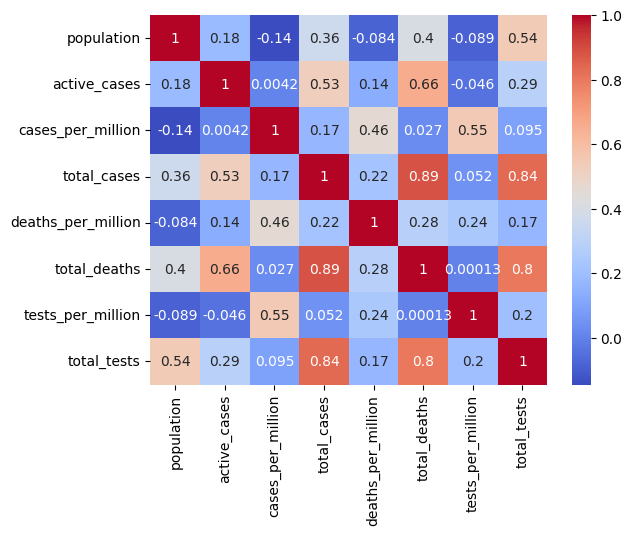

In [51]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

#✅ STEP 5 — Visualization (EDA ka Real Touch)

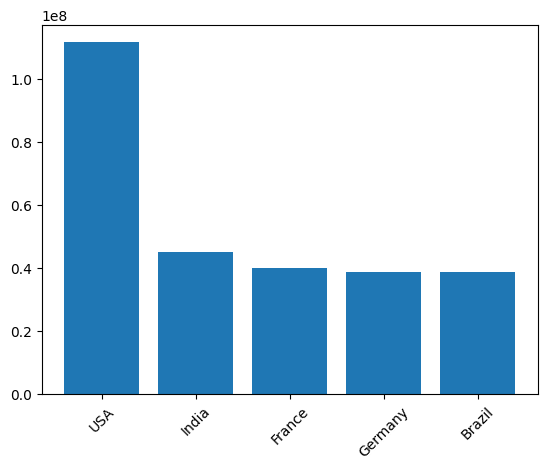

In [52]:
top5 = df.sort_values(by='total_cases', ascending=False).head(5)

plt.figure()
plt.bar(top5['country'], top5['total_cases'])
plt.xticks(rotation=45)
plt.show()

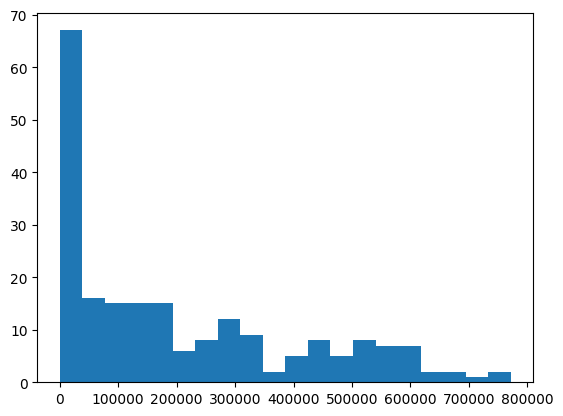

In [56]:
plt.hist(df['cases_per_million'], bins=20)
plt.show()

#✅ STEP 6 — Derived Feature (Advanced Touch)

In [57]:
#Case Fatality Rate (CFR)
df['CFR'] = (df['total_deaths'] / df['total_cases']) * 100

In [58]:
df.head(3)

,country,population,date,active_cases,cases_per_million,total_cases,deaths_per_million,total_deaths,tests_per_million,total_tests,CFR
0,Eritrea,3662244,2026-02-16,0,2782,10189,28,103,6470,23693,1.010894
1,Niger,26083660,2026-02-16,729,381,9931,12,312,9759,254538,3.141678
2,Montserrat,4965,2026-02-16,19,282578,1403,1611,8,3577442,17762,0.570207


#Clean Data + Insight Extraction + Visualization + Interpretation = Real EDA

In [60]:
df.to_csv('covid19_data_cleaned.csv' , index=False)

In [61]:
import os
os.getcwd()


'C:\\Users\\MY PC'